(0.0, 1.0)

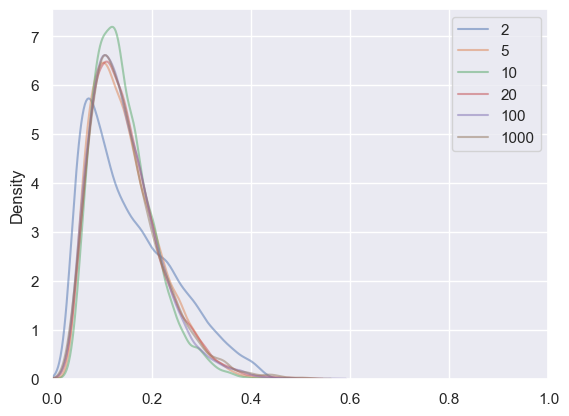

In [432]:
from scipy import stats

N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
plt.xlim(0,1)

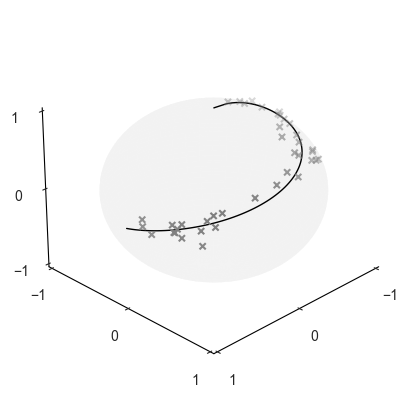

In [35]:
%matplotlib inline

import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyfrechet.metric_spaces import *

import seaborn as sns
# sns.set_style("whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def m(z):
    dz = np.sqrt(1 - z**2)
    pz = np.pi * z
    y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
    return y


def plot_some_data(N, ax):
    M = Sphere(2)
    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)
    mx = m(np.random.rand(N))
    y = 1.04*np.array([ add_noise(mx[i,:], 0.1) for i in range(N)])
    ax.scatter(y[:,0], y[:,1], y[:,2], depthshade=True, color='grey', marker='x')

# Make data for the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere
ax.plot_surface(x, y, z, edgecolor='none', color=(0.95,0.95,0.95), alpha=0.75, shade=False)

# make a dataset
P = 1.04*m(np.linspace(0,1,100))
# ax.scatter(P[:,0], P[:,1], P[:,2], depthshade=True, color='black', s=10)
ax.plot(P[:,0], P[:,1], P[:,2], color='black', linewidth=1)

plot_some_data(40, ax)

ax.view_init(27, 45)

ax.margins(x=0,y=0, tight=True)
ax.set_facecolor('white')

# Set color of pane edges to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Set color of the grid lines
ax.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
ax.set_xticks([-1, 0, 1]); ax.set_yticks([-1, 0, 1]); ax.set_zticks([-1, 0, 1])
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.grid(False)

plt.savefig('./plots/sample_sphere.pdf')

In [5]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
from scipy import stats
from benchmark import bench
from pyfrechet.metric_spaces import *

OUT_FILE = 'results/result_sphere_cross_est_new_dgp_test.json'

def gen_data(N, p, alpha, beta, eps=0.1):
    M = Sphere(2)

    def m(x):
        eta = 2 * (x - 0.5).dot(beta) / np.sqrt(p) + alpha
        z = stats.logistic.cdf(eta)
        dz = np.sqrt(1 - z**2)
        pz = np.pi * z
        y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
        return y

    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)

    x = np.random.rand(N*p).reshape((N,p))
    mx = m(x)
    y = np.array([ add_noise(mx[i,:], eps) for i in range(N)])
    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[20],
    Ns=[400],
    replicas=10
)

[2023-06-17 22:04:29.771016] Progress: N=400	p=20	i=0
[2023-06-17 22:04:29.803472] Distances for cart_2means
[2023-06-17 22:04:29.803491] dt = 0
[2023-06-17 22:04:29.803495] Fitting for cart_2means
[2023-06-17 22:04:32.264251] dt = 2.460779905319214
[2023-06-17 22:04:32.264334] MSE for cart_2means
[2023-06-17 22:04:32.279355] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-17 22:04:32.691019] dt = 0.4116537570953369
[2023-06-17 22:04:32.691045] Fitting for medoid_2means
[2023-06-17 22:04:34.497259] dt = 1.8062493801116943
[2023-06-17 22:04:34.497359] MSE for medoid_2means
[2023-06-17 22:04:34.511636] Distances for medoid_greedy
[2023-06-17 22:04:34.511644] dt = 0.0
[2023-06-17 22:04:34.511648] Fitting for medoid_greedy
[2023-06-17 22:04:41.146306] dt = 6.634667873382568
[2023-06-17 22:04:41.146381] MSE for medoid_greedy
[2023-06-17 22:04:41.161787] Progress: N=400	p=20	i=1
[2023-06-17 22:04:41.183401] Distances for cart_2means
[2023-06-17 22:04:41.183410] dt = 0
[2023-06-17 22:04:41.183414] Fitting for cart_2means
[2023-06-17 22:04:43.511335] dt = 2.327932357788086
[2023-06-17 22:04:43.511411] MSE for cart_2means
[2023-06-17 22:04:43.526086] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-17 22:04:43.925151] dt = 0.39905309677124023
[2023-06-17 22:04:43.925177] Fitting for medoid_2means
[2023-06-17 22:04:45.850273] dt = 1.9251337051391602
[2023-06-17 22:04:45.850349] MSE for medoid_2means
[2023-06-17 22:04:45.864936] Distances for medoid_greedy
[2023-06-17 22:04:45.864947] dt = 9.5367431640625e-07
[2023-06-17 22:04:45.864953] Fitting for medoid_greedy
[2023-06-17 22:04:53.305088] dt = 7.440150260925293
[2023-06-17 22:04:53.305169] MSE for medoid_greedy
[2023-06-17 22:04:53.319665] Progress: N=400	p=20	i=2
[2023-06-17 22:04:53.340942] Distances for cart_2means
[2023-06-17 22:04:53.340954] dt = 0
[2023-06-17 22:04:53.340957] Fitting for cart_2means
[2023-06-17 22:04:55.512925] dt = 2.1719818115234375
[2023-06-17 22:04:55.512999] MSE for cart_2means
[2023-06-17 22:04:55.527655] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-17 22:04:55.949925] dt = 0.4222590923309326
[2023-06-17 22:04:55.949951] Fitting for medoid_2means
[2023-06-17 22:04:57.682495] dt = 1.732578992843628
[2023-06-17 22:04:57.682565] MSE for medoid_2means
[2023-06-17 22:04:57.697052] Distances for medoid_greedy
[2023-06-17 22:04:57.697069] dt = 1.1920928955078125e-06
[2023-06-17 22:04:57.697075] Fitting for medoid_greedy
[2023-06-17 22:05:04.682447] dt = 6.985393047332764
[2023-06-17 22:05:04.682522] MSE for medoid_greedy
[2023-06-17 22:05:04.696955] Progress: N=400	p=20	i=3
[2023-06-17 22:05:04.718514] Distances for cart_2means
[2023-06-17 22:05:04.718523] dt = 0
[2023-06-17 22:05:04.718526] Fitting for cart_2means
[2023-06-17 22:05:07.000494] dt = 2.2819790840148926
[2023-06-17 22:05:07.000576] MSE for cart_2means
[2023-06-17 22:05:07.015072] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-17 22:05:07.452699] dt = 0.43761634826660156
[2023-06-17 22:05:07.452727] Fitting for medoid_2means
[2023-06-17 22:05:09.310844] dt = 1.8581557273864746
[2023-06-17 22:05:09.310924] MSE for medoid_2means
[2023-06-17 22:05:09.325171] Distances for medoid_greedy
[2023-06-17 22:05:09.325179] dt = 7.152557373046875e-07
[2023-06-17 22:05:09.325185] Fitting for medoid_greedy
[2023-06-17 22:05:19.394945] dt = 10.06977128982544
[2023-06-17 22:05:19.395021] MSE for medoid_greedy
[2023-06-17 22:05:19.409329] Progress: N=400	p=20	i=4
[2023-06-17 22:05:19.430832] Distances for cart_2means
[2023-06-17 22:05:19.430846] dt = 0
[2023-06-17 22:05:19.430850] Fitting for cart_2means
[2023-06-17 22:05:21.751593] dt = 2.320758581161499
[2023-06-17 22:05:21.751738] MSE for cart_2means
[2023-06-17 22:05:21.768316] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:05:22.303207] dt = 0.5348691940307617
[2023-06-17 22:05:22.303232] Fitting for medoid_2means
[2023-06-17 22:05:24.190026] dt = 1.8868408203125
[2023-06-17 22:05:24.190103] MSE for medoid_2means
[2023-06-17 22:05:24.204522] Distances for medoid_greedy
[2023-06-17 22:05:24.204530] dt = 0.0
[2023-06-17 22:05:24.204534] Fitting for medoid_greedy
[2023-06-17 22:05:33.513934] dt = 9.30941104888916
[2023-06-17 22:05:33.514019] MSE for medoid_greedy
[2023-06-17 22:05:33.529285] Progress: N=400	p=20	i=5
[2023-06-17 22:05:33.550880] Distances for cart_2means
[2023-06-17 22:05:33.550894] dt = 0
[2023-06-17 22:05:33.550897] Fitting for cart_2means
[2023-06-17 22:05:35.908689] dt = 2.357808828353882
[2023-06-17 22:05:35.908772] MSE for cart_2means
[2023-06-17 22:05:35.923792] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:05:36.411549] dt = 0.4877469539642334
[2023-06-17 22:05:36.411576] Fitting for medoid_2means
[2023-06-17 22:05:38.278337] dt = 1.8667962551116943
[2023-06-17 22:05:38.278413] MSE for medoid_2means
[2023-06-17 22:05:38.293867] Distances for medoid_greedy
[2023-06-17 22:05:38.293879] dt = 9.5367431640625e-07
[2023-06-17 22:05:38.293885] Fitting for medoid_greedy
[2023-06-17 22:05:47.003133] dt = 8.709259986877441
[2023-06-17 22:05:47.003245] MSE for medoid_greedy
[2023-06-17 22:05:47.021742] Progress: N=400	p=20	i=6
[2023-06-17 22:05:47.048221] Distances for cart_2means
[2023-06-17 22:05:47.048239] dt = 0
[2023-06-17 22:05:47.048243] Fitting for cart_2means
[2023-06-17 22:05:49.706593] dt = 2.6583731174468994
[2023-06-17 22:05:49.706674] MSE for cart_2means
[2023-06-17 22:05:49.722172] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:05:50.257256] dt = 0.5350737571716309
[2023-06-17 22:05:50.257286] Fitting for medoid_2means
[2023-06-17 22:05:52.233315] dt = 1.976067304611206
[2023-06-17 22:05:52.233393] MSE for medoid_2means
[2023-06-17 22:05:52.249202] Distances for medoid_greedy
[2023-06-17 22:05:52.249214] dt = 0.0
[2023-06-17 22:05:52.249219] Fitting for medoid_greedy
[2023-06-17 22:06:01.706710] dt = 9.457507133483887
[2023-06-17 22:06:01.706789] MSE for medoid_greedy
[2023-06-17 22:06:01.721554] Progress: N=400	p=20	i=7
[2023-06-17 22:06:01.743141] Distances for cart_2means
[2023-06-17 22:06:01.743157] dt = 0
[2023-06-17 22:06:01.743161] Fitting for cart_2means
[2023-06-17 22:06:04.195291] dt = 2.4521501064300537
[2023-06-17 22:06:04.195370] MSE for cart_2means
[2023-06-17 22:06:04.211686] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:06:04.714604] dt = 0.502903938293457
[2023-06-17 22:06:04.714632] Fitting for medoid_2means
[2023-06-17 22:06:06.633073] dt = 1.9184823036193848
[2023-06-17 22:06:06.633150] MSE for medoid_2means
[2023-06-17 22:06:06.648866] Distances for medoid_greedy
[2023-06-17 22:06:06.648877] dt = 0.0
[2023-06-17 22:06:06.648882] Fitting for medoid_greedy
[2023-06-17 22:06:14.878829] dt = 8.229960918426514
[2023-06-17 22:06:14.878913] MSE for medoid_greedy
[2023-06-17 22:06:14.894298] Progress: N=400	p=20	i=8
[2023-06-17 22:06:14.917841] Distances for cart_2means
[2023-06-17 22:06:14.917853] dt = 0
[2023-06-17 22:06:14.917856] Fitting for cart_2means
[2023-06-17 22:06:17.314201] dt = 2.396358013153076
[2023-06-17 22:06:17.314284] MSE for cart_2means
[2023-06-17 22:06:17.329625] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:06:17.834678] dt = 0.5050430297851562
[2023-06-17 22:06:17.834707] Fitting for medoid_2means
[2023-06-17 22:06:19.690481] dt = 1.8558118343353271
[2023-06-17 22:06:19.690566] MSE for medoid_2means
[2023-06-17 22:06:19.707190] Distances for medoid_greedy
[2023-06-17 22:06:19.707202] dt = 9.5367431640625e-07
[2023-06-17 22:06:19.707209] Fitting for medoid_greedy
[2023-06-17 22:06:27.530716] dt = 7.823523998260498
[2023-06-17 22:06:27.530794] MSE for medoid_greedy
[2023-06-17 22:06:27.546281] Progress: N=400	p=20	i=9
[2023-06-17 22:06:27.569561] Distances for cart_2means
[2023-06-17 22:06:27.569572] dt = 0
[2023-06-17 22:06:27.569575] Fitting for cart_2means
[2023-06-17 22:06:30.181773] dt = 2.612210988998413
[2023-06-17 22:06:30.181848] MSE for cart_2means
[2023-06-17 22:06:30.197808] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-17 22:06:30.703918] dt = 0.5060939788818359
[2023-06-17 22:06:30.703944] Fitting for medoid_2means
[2023-06-17 22:06:32.608615] dt = 1.9047119617462158
[2023-06-17 22:06:32.608696] MSE for medoid_2means
[2023-06-17 22:06:32.625139] Distances for medoid_greedy
[2023-06-17 22:06:32.625150] dt = 0.0
[2023-06-17 22:06:32.625154] Fitting for medoid_greedy
[2023-06-17 22:06:40.578138] dt = 7.952998161315918
[2023-06-17 22:06:40.578222] MSE for medoid_greedy


In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json


OUT_FILE = 'results/result_sphere_cross_est_new_dgp_fixed_order.json'
# OUT_FILE = 'results/result_sphere_cross_est_new_dgp_75.json'

def load_data(path):
    with open(path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
    df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
    df['fitting_duration'] = df['duration'] - df['dist_duration']
    return df

df_25 = load_data('results/result_sphere_cross_est_new_dgp_test.json')
df_25['batch'] = 'test'
df_75 = load_data('results/result_sphere_cross_est_new_dgp_75.json')
df_75['batch'] = '75'

df_all = pd.concat([df_25, df_75])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json


# OUT_FILE = 'results/result_sphere_cross_est_new_dgp_fixed_order.json'
# OUT_FILE = 'results/result_sphere_cross_est_new_dgp_75.json'

def load_data(path):
    with open(path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
    df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
    df['fitting_duration'] = df['duration'] - df['dist_duration']
    return df

df_test = load_data('results/result_sphere_cross_est_new_dgp_test.json')

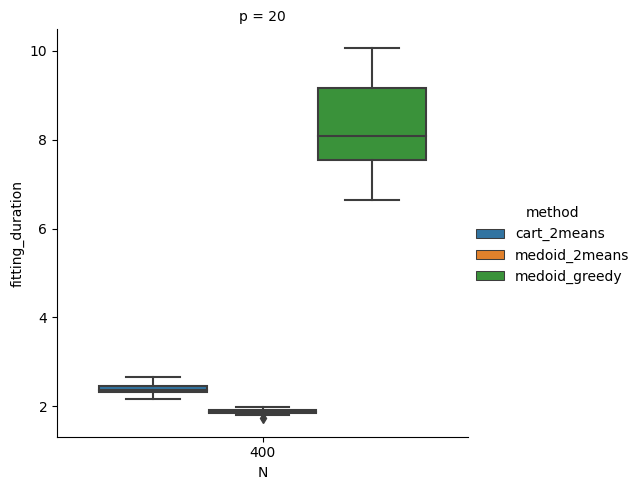

In [7]:
# sns.histplot(df, x='fitting_duration', hue='group')

grid = sns.catplot(df_test,
        x='N', y='fitting_duration',
        col="p",
        hue='method',
        kind='box')

# grid = sns.catplot(df_75[df_75.method == 'cart_2means'],
#         x='N', y='duration',
#         col="p",
#         hue='method',
#         kind='box')

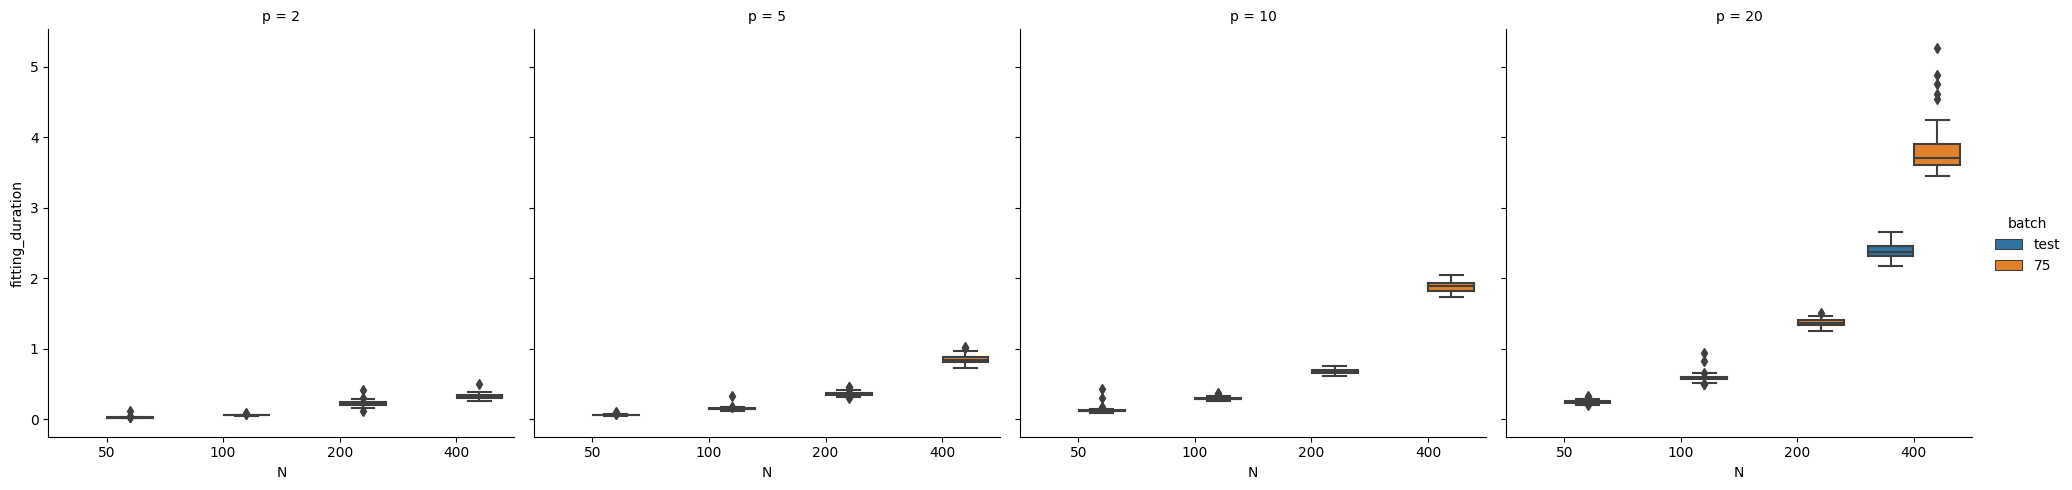

In [14]:


grid = sns.catplot(df_all[df_all['method'] == 'cart_2means'],
        x='N', y='fitting_duration',
        col="p",
        hue='batch',
        kind='box')

# grid = sns.catplot(df_75[df_75['method'] == 'cart_2means'],
#         x='N', y='fitting_duration',
#         col="p",
#         hue='method',
#         kind='box')

In [4]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 


import numpy as np
from pyfrechet.metric_spaces import *
from pyfrechet.regression.trees import Tree
from pyfrechet.metrics import mse
from datetime import datetime
import numpy as np
from scipy import stats
from benchmark import bench
from pyfrechet.metric_spaces import *


import time
import sklearn
import json

def gen_data(N, p, alpha, beta, eps=0.1):
    M = Sphere(2)

    def m(x):
        eta = 2 * (x - 0.5).dot(beta) / np.sqrt(p) + alpha
        z = stats.logistic.cdf(eta)
        dz = np.sqrt(1 - z**2)
        pz = np.pi * z
        y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
        return y

    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)

    x = np.random.rand(N*p).reshape((N,p))
    mx = m(x)
    y = np.array([ add_noise(mx[i,:], eps) for i in range(N)])
    return x, MetricData(M, y), MetricData(M, mx)

cart_2means = Tree(impurity_method='cart', split_type='2means')
medoid_greedy = Tree(impurity_method='medoid', split_type='greedy')

results = []
for N in [400]:
    for p in [20]:
        for i in range(1):
            print(f'[{str(datetime.now())}] Progress: N={N}\tp={p}\ti={i}')
            beta = np.random.randn(p)
            alpha = np.random.randn()
            X_train, y_train, _ = gen_data(N, p, alpha, beta)
            X_test, _, mx_test = gen_data(50, p, alpha, beta)
            y_train.compute_distances()
            print('fitting cart_2means')
            cart_2means = cart_2means.fit(X_train, y_train)
            print('fitting medoid_greedy')
            medoid_greedy = medoid_greedy.fit(X_train, y_train)
            


[2023-06-17 22:02:49.837287] Progress: N=400	p=20	i=0


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:22: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 /Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/fdasrsf/umap_metric.py:54: NumbaDeprecationWarning:The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will b

fitting cart_2means
fitting medoid_greedy


In [25]:
def n_nodes(tree):
    if tree.split is None:
        return 1
    else:
        return 1 + n_nodes(tree.left) + n_nodes(tree.right)

print(n_nodes(cart_2means.root_node), n_nodes(medoid_greedy.root_node))
print(mse(mx_test, cart_2means.predict(X_test)), mse(mx_test, medoid_greedy.predict(X_test)))

103 111
0.08734971995571508 0.054041487645776744


In [13]:
# for r in results:
#     tmp = r[2]
#     r[2] = r[1]
#     r[1] = tmp
# with open('results/result_sphere_cross_est_new_dgp_fixed_order.json', 'w') as f:
#     json.dump(results, f)

 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


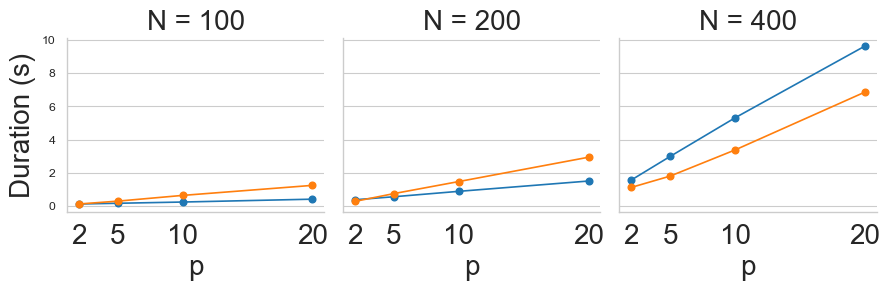

In [27]:
from plot_bench import *

forest_df = make_forest_df(df[df.method != 'medoid_2means'])
plot_forest_df(forest_df)
plt.savefig("./plots/runtime_sphere.pdf")

## MSE CART vs Medoid

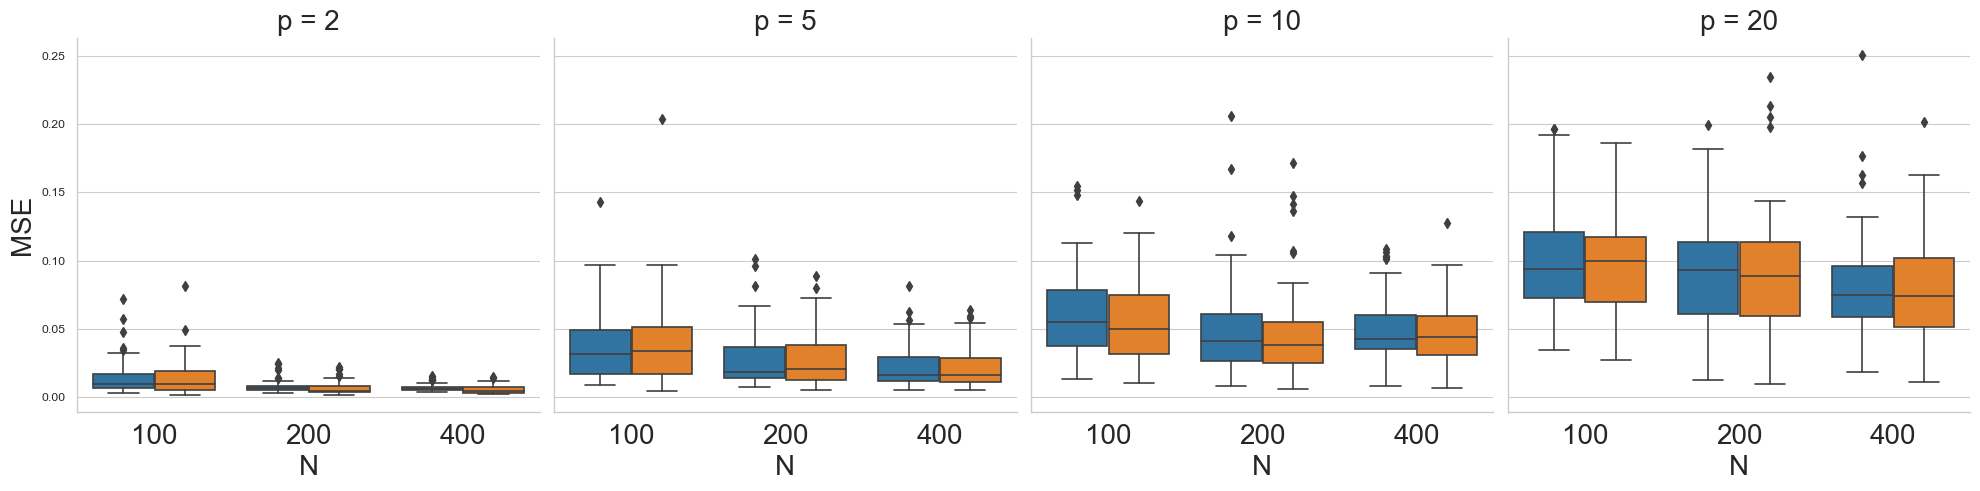

In [26]:
from plot_bench import *
plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plt.savefig("./plots/error_sphere.pdf")

## Runtime CART vs Medoid

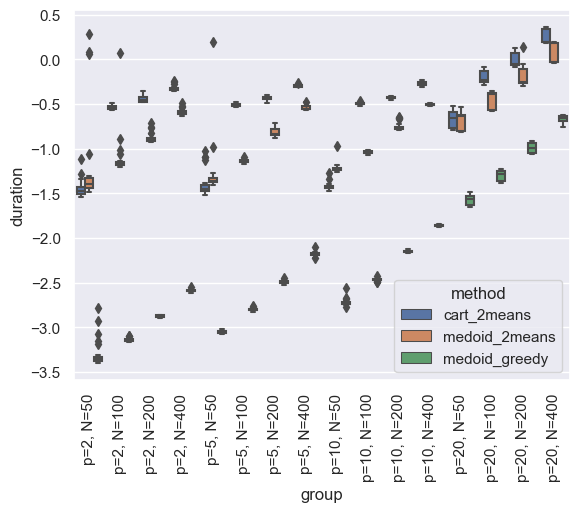

In [289]:
sns.boxplot(df, y=np.log10(df['duration']), x='group', hue='method')
plt.xticks(rotation=90);